In [1]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord, get_moon, get_sun
from astropy import units as u
from astropy.time import Time
import astropy
import numpy as np
from astropy.visualization import astropy_mpl_style
from calendar import month_name as month_name

In [2]:
from astroquery import mpc

In [3]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use(astropy_mpl_style)

In [4]:
%matplotlib inline

In [5]:
start_hr = 12
total_time = 24*u.hour
time_delta = 5*u.minute
nsteps = int(total_time / time_delta) + 1 # I assume here that delta fits in total time. This is probably ok. 

In [6]:
location = astropy.coordinates.EarthLocation.of_address("Dwingeloo")
# This does a query on OpenStreetmaps, so you could fill in a specific address.
# location = astropy.coordinates.EarthLocation.of_address("Oude Hoogeveensedijk 4," 
#                                                         "Dwingeloo, Netherlands")

In [7]:
def get_scoords(date, location):
    start_time=Time('{date} {start}:0:0.000'.format(date=date, start=start_hr))
    timespan = nsteps * time_delta
    query = mpc.MPCClass()
    eph = query.get_ephemeris(target='gerdebruijn', start=start_time, step=time_delta, number=nsteps)
    scoords = SkyCoord(eph['RA'],eph['Dec'], obstime=eph['Date'], location=location).altaz
    magnitudes = eph['V']
    return scoords, min(magnitudes), max(magnitudes)

In [8]:
scoords, magmin, magmax = get_scoords(date ="2019-02-01", location=location)
Times = Time(scoords.obstime.datetime)
sun_coords = SkyCoord(get_sun(Times), location=location).altaz
moon_coords = SkyCoord(get_moon(Times), location=location).altaz

In [9]:
Alts = scoords.alt
Azs = scoords.az

In [10]:
SunAlts = sun_coords.alt
MoonAlts = moon_coords.alt
SunAzs = sun_coords.az
MoonAzs = moon_coords.az

In [11]:
x_times = Times.datetime

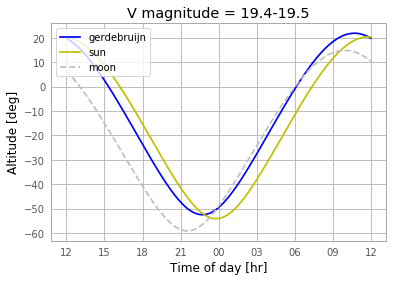

In [12]:
fig = plt.subplot(111)
fig.plot(x_times, Alts, label='gerdebruijn', color='b')
fig.plot(x_times, SunAlts, label='sun', color='y')
fig.plot(x_times, MoonAlts, label='moon', color=[0.75]*3, ls='--')
plt.title("V magnitude = {magmin}-{magmax}".format(magmin=magmin, magmax=magmax) )
plt.xlabel('Time of day [hr]')
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper left')
fig.xaxis.set_major_formatter(DateFormatter('%H'))

In [14]:
scolist = list()
for month in range(4,10):
    scolist.append([month_name[month], get_scoords(date = "2019-{mo}-01".format(mo=month), 
                                                   location=location)])

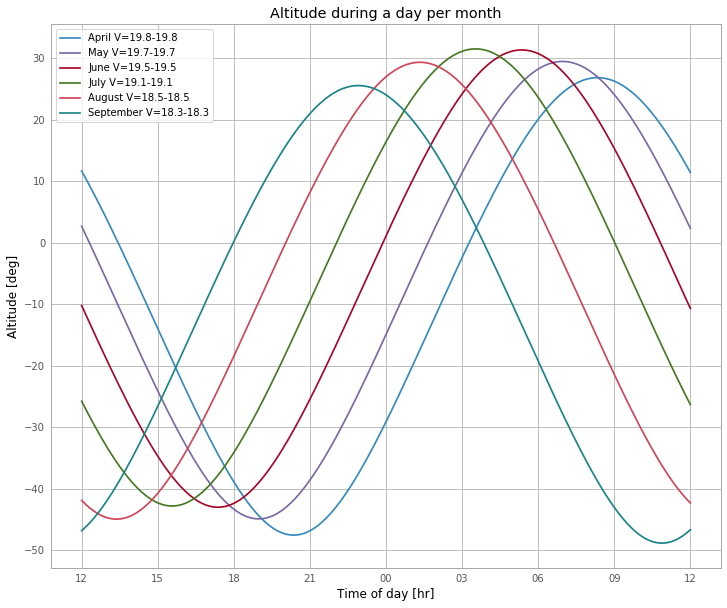

In [22]:
plt.figure(figsize=(12,10))
fig = plt.subplot(111)
for scodat in scolist:
    month_name = scodat[0]
    sco, magmin, magmax = scodat[1]
    fig.plot(x_times, sco.alt, label="{month} V={magmin}-{magmax}".format(month=month_name,
                                                                         magmin=magmin,
                                                                         magmax=magmax))

plt.legend(loc='upper left')
plt.xlabel('Time of day [hr]')
plt.ylabel('Altitude [deg]')
plt.legend(loc='upper left')
fig.xaxis.set_major_formatter(DateFormatter('%H'))
plt.title("Altitude during a day per month");